1.
Escoger de algún modo los 5 pares de columnas que mejor separan a los vinos de mejor calidad de los de peor calidad, un vino es buena calidad si su quality es mayor a 5, en esta sección también se espera que expliques tus elecciones y muestres por lo menos dos ejemplos de pares de columnas que nos separan bien los datos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# Cargar los datos
data = pd.read_csv('winequality-redTarea3.csv')

# Definir vinos de buena calidad
data['good_quality'] = (data['quality'] > 5).astype(int)


In [ ]:
corr_matrix = data.corr()
corr_matrix.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.109494


In [ ]:
features = [col for col in data.columns if col not in ['quality', 'good_quality']]

In [ ]:
feature_pairs = list(combinations(features, 2))
feature_pairs

[('fixed acidity', 'volatile acidity'),
 ('fixed acidity', 'citric acid'),
 ('fixed acidity', 'residual sugar'),
 ('fixed acidity', 'chlorides'),
 ('fixed acidity', 'free sulfur dioxide'),
 ('fixed acidity', 'total sulfur dioxide'),
 ('fixed acidity', 'density'),
 ('fixed acidity', 'pH'),
 ('fixed acidity', 'sulphates'),
 ('fixed acidity', 'alcohol'),
 ('volatile acidity', 'citric acid'),
 ('volatile acidity', 'residual sugar'),
 ('volatile acidity', 'chlorides'),
 ('volatile acidity', 'free sulfur dioxide'),
 ('volatile acidity', 'total sulfur dioxide'),
 ('volatile acidity', 'density'),
 ('volatile acidity', 'pH'),
 ('volatile acidity', 'sulphates'),
 ('volatile acidity', 'alcohol'),
 ('citric acid', 'residual sugar'),
 ('citric acid', 'chlorides'),
 ('citric acid', 'free sulfur dioxide'),
 ('citric acid', 'total sulfur dioxide'),
 ('citric acid', 'density'),
 ('citric acid', 'pH'),
 ('citric acid', 'sulphates'),
 ('citric acid', 'alcohol'),
 ('residual sugar', 'chlorides'),
 ('resid

In [ ]:
pair_scores = []
for f1, f2 in feature_pairs:
    corr_diff = abs(corr_matrix.loc[f1, 'good_quality'] - corr_matrix.loc[f2, 'good_quality'])
    pair_scores.append((f1, f2, corr_diff))

In [ ]:
pair_scores.sort(key=lambda x: x[2], reverse=True)

In [ ]:
top_5_pairs = pair_scores[:5]

In [ ]:
top_5_pairs

[('volatile acidity', 'alcohol', 0.7561920591149852),
 ('total sulfur dioxide', 'alcohol', 0.666714180429369),
 ('density', 'alcohol', 0.5938611735854185),
 ('chlorides', 'alcohol', 0.5442452011393085),
 ('volatile acidity', 'sulphates', 0.5395125172737385)]

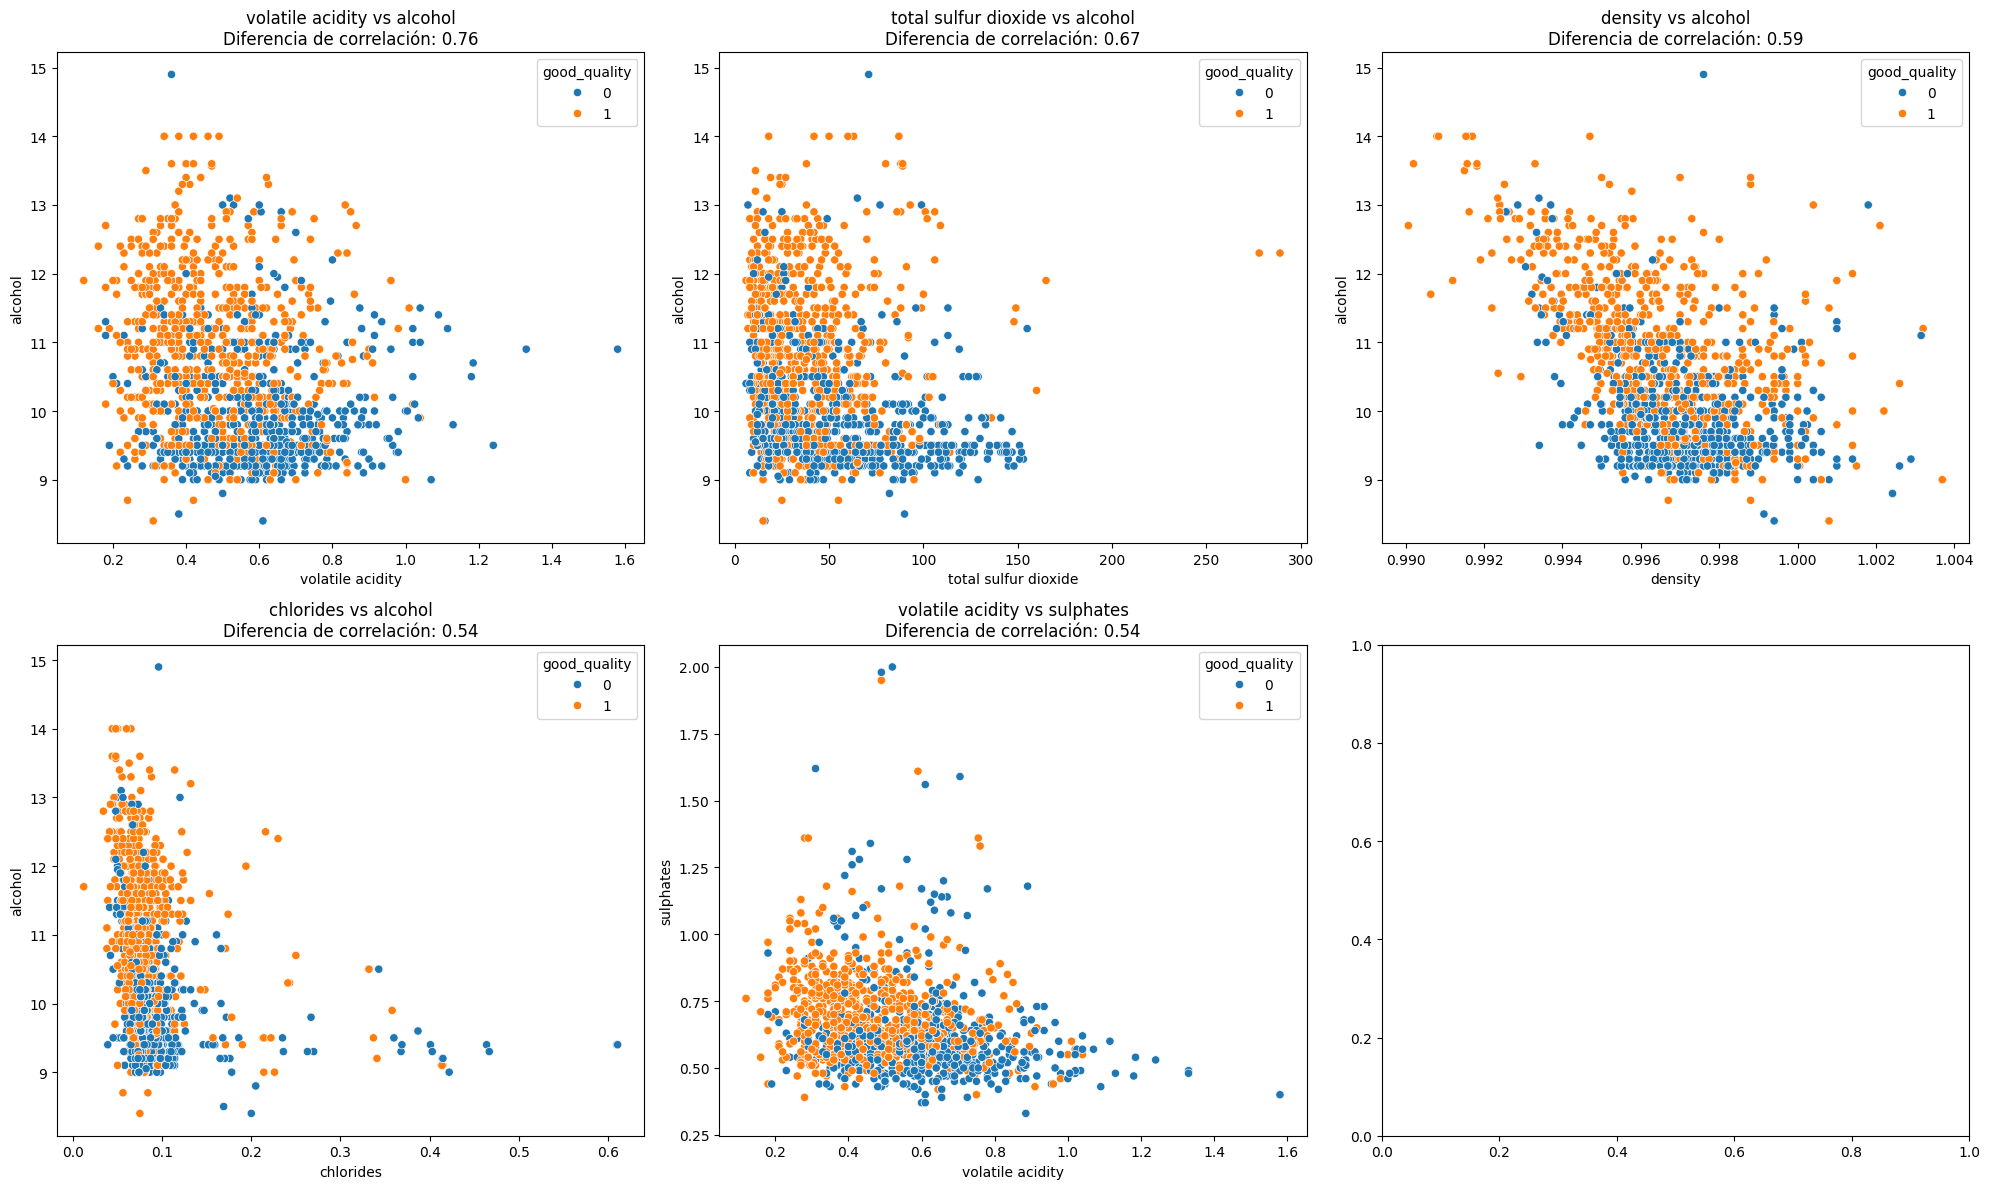

Los 5 mejores pares de columnas para separar vinos de buena y mala calidad son:
volatile acidity vs alcohol: Diferencia de correlación = 0.76
total sulfur dioxide vs alcohol: Diferencia de correlación = 0.67
density vs alcohol: Diferencia de correlación = 0.59
chlorides vs alcohol: Diferencia de correlación = 0.54
volatile acidity vs sulphates: Diferencia de correlación = 0.54


In [ ]:
# Visualizar los resultados
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
axs = axs.ravel()

for i, (col1, col2, score) in enumerate(top_5_pairs):
    sns.scatterplot(data=data, x=col1, y=col2, hue='good_quality', ax=axs[i])
    axs[i].set_title(f"{col1} vs {col2}\nDiferencia de correlación: {score:.2f}")

plt.tight_layout()
plt.show()

print("Los 5 mejores pares de columnas para separar vinos de buena y mala calidad son:")
for col1, col2, score in top_5_pairs:
    print(f"{col1} vs {col2}: Diferencia de correlación = {score:.2f}")

Observaciones:
1.	El alcohol aparece en la mayoria de los pares de columnas seleccionados, lo que sugiere que es una característica muy importante para determinar la calidad del vino.
2.	La combinación de alcohol y acidez volátil (volatile acidity) es la que mejor separa los vinos de buena y mala calidad. Esto tiene sentido, ya que un alto contenido de alcohol generalmente se asocia con vinos de mejor calidad, mientras que una alta acidez volátil puede indicar defectos en el vino.
3.	La relación entre alcohol y dióxido de azufre total (total sulfur dioxide) también es importante. El dióxido de azufre se usa como conservante en el vino, y su cantidad puede afectar la calidad percibida.
4.	La densidad y los cloruros (chlorides) también juegan un papel importante en combinación con el alcohol para determinar la calidad del vino.


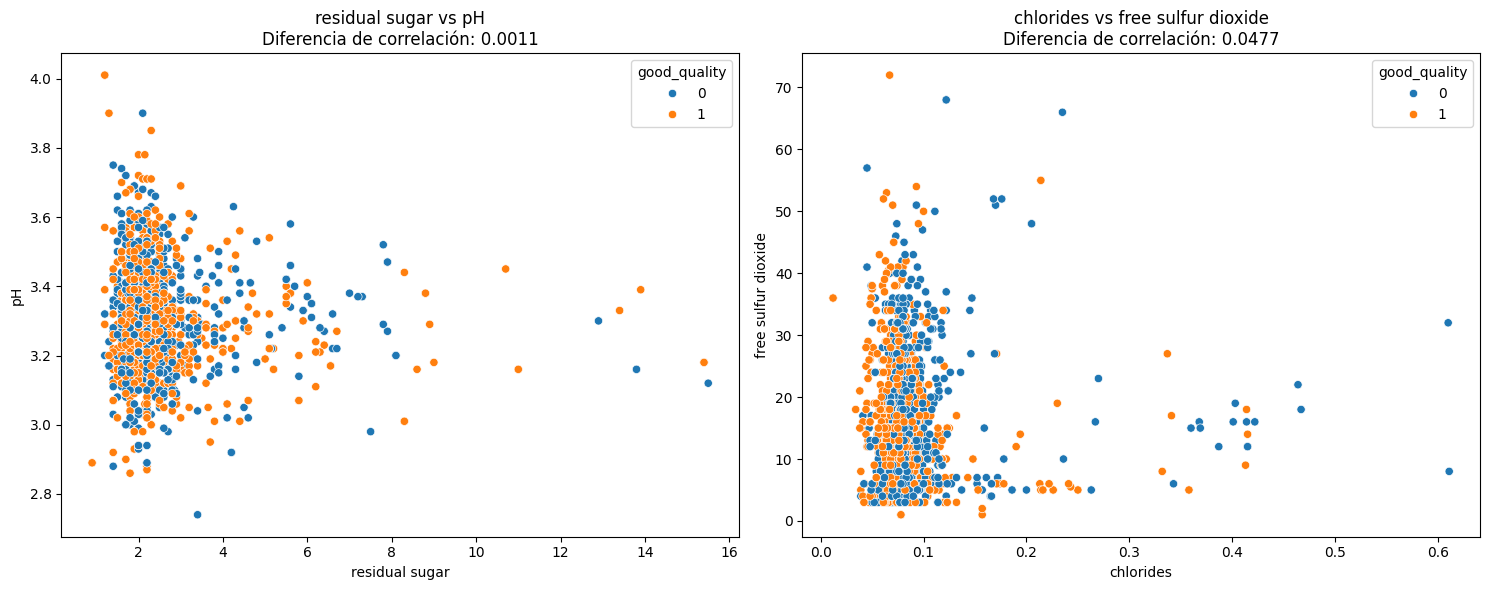

Los 2 peores pares de columnas para separar vinos de buena y mala calidad son:
residual sugar vs pH: Diferencia de correlación = 0.0011
chlorides vs free sulfur dioxide: Diferencia de correlación = 0.0477


In [ ]:
# Ordenar los pares por la diferencia de correlación, de menor a mayor
pair_scores.sort(key=lambda x: x[2])

# Seleccionar los 2 peores pares (los que tienen la menor diferencia de correlación)
worst_2_pairs = pair_scores[:2]

# Visualizar los resultados
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

for i, (col1, col2, score) in enumerate(worst_2_pairs):
    sns.scatterplot(data=data, x=col1, y=col2, hue='good_quality', ax=axs[i])
    axs[i].set_title(f"{col1} vs {col2}\nDiferencia de correlación: {score:.4f}")

plt.tight_layout()
plt.show()

print("Los 2 peores pares de columnas para separar vinos de buena y mala calidad son:")
for col1, col2, score in worst_2_pairs:
    print(f"{col1} vs {col2}: Diferencia de correlación = {score:.4f}")

2.
Usar métodos de reducción de dimensionalidad lineal y no lineal conocidos para reducir la cantidad de columnas para poder visualizar los datos, esperamos que para cada uno de estos métodos muestres la separación entre calidades (Cada calidad por separado) y la separación entre vinos buenos y malos. Explicar los resultados y la significancia de estos.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
data = pd.read_csv('winequality-redTarea3.csv')

# Separar características y calidad
X = data.drop('quality', axis=1)
y = data['quality']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir vinos buenos (calidad > 5) y malos (calidad < 5)
y_binary = (y > 5).astype(int)

In [8]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


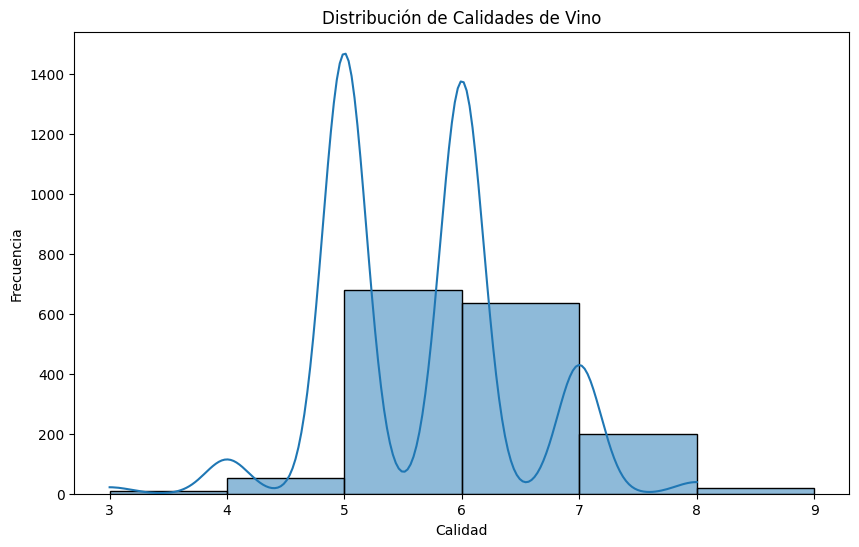

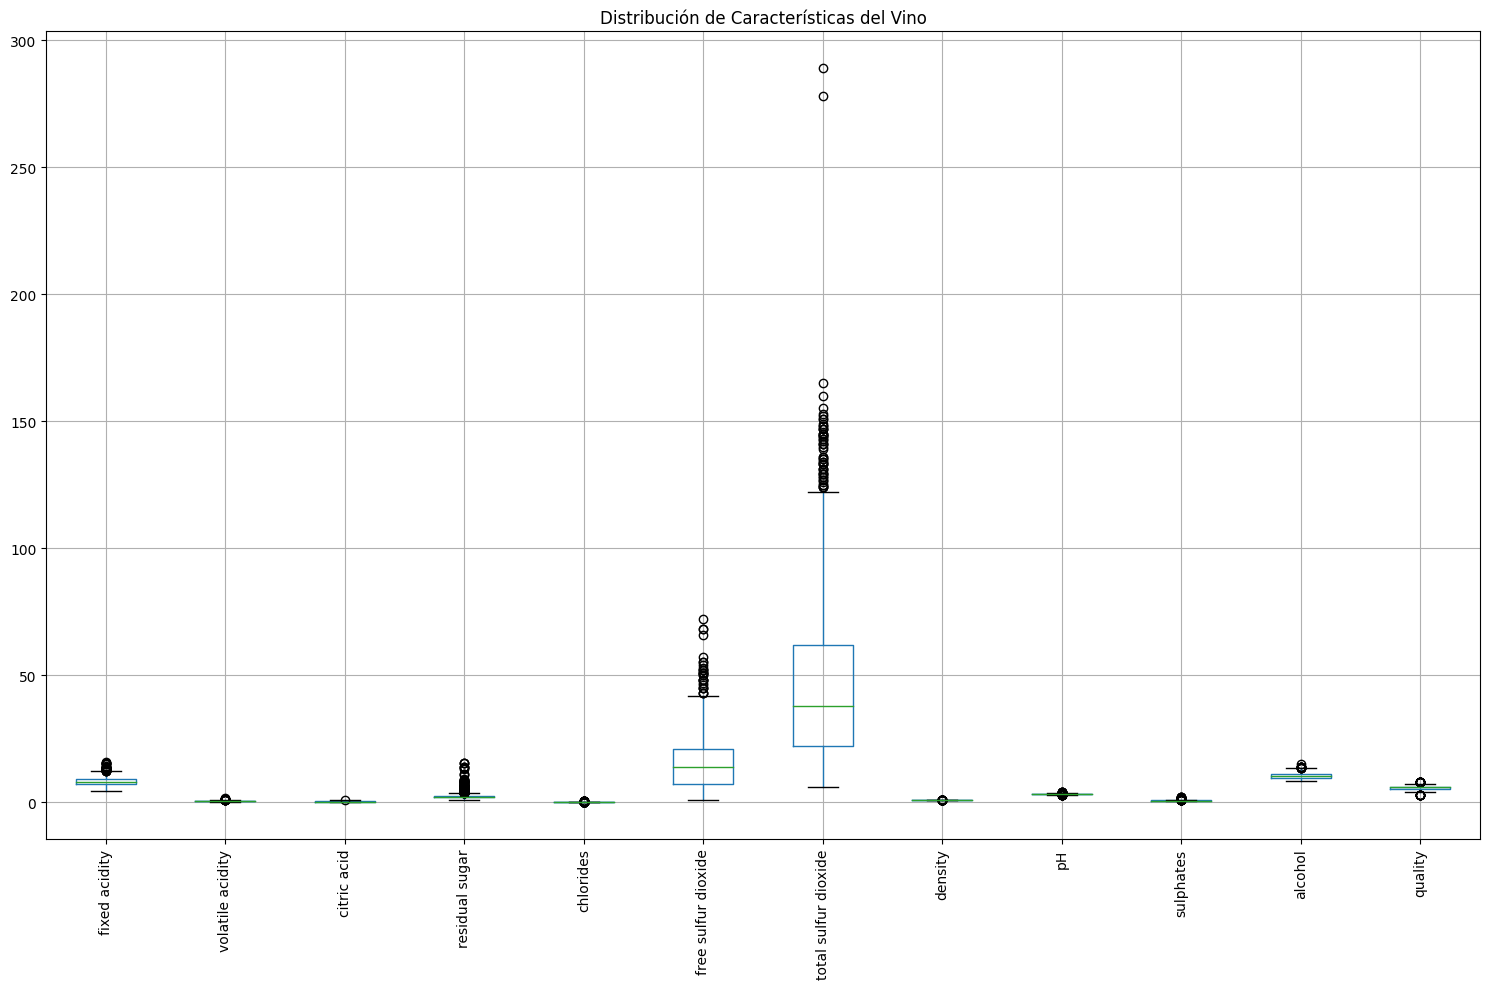

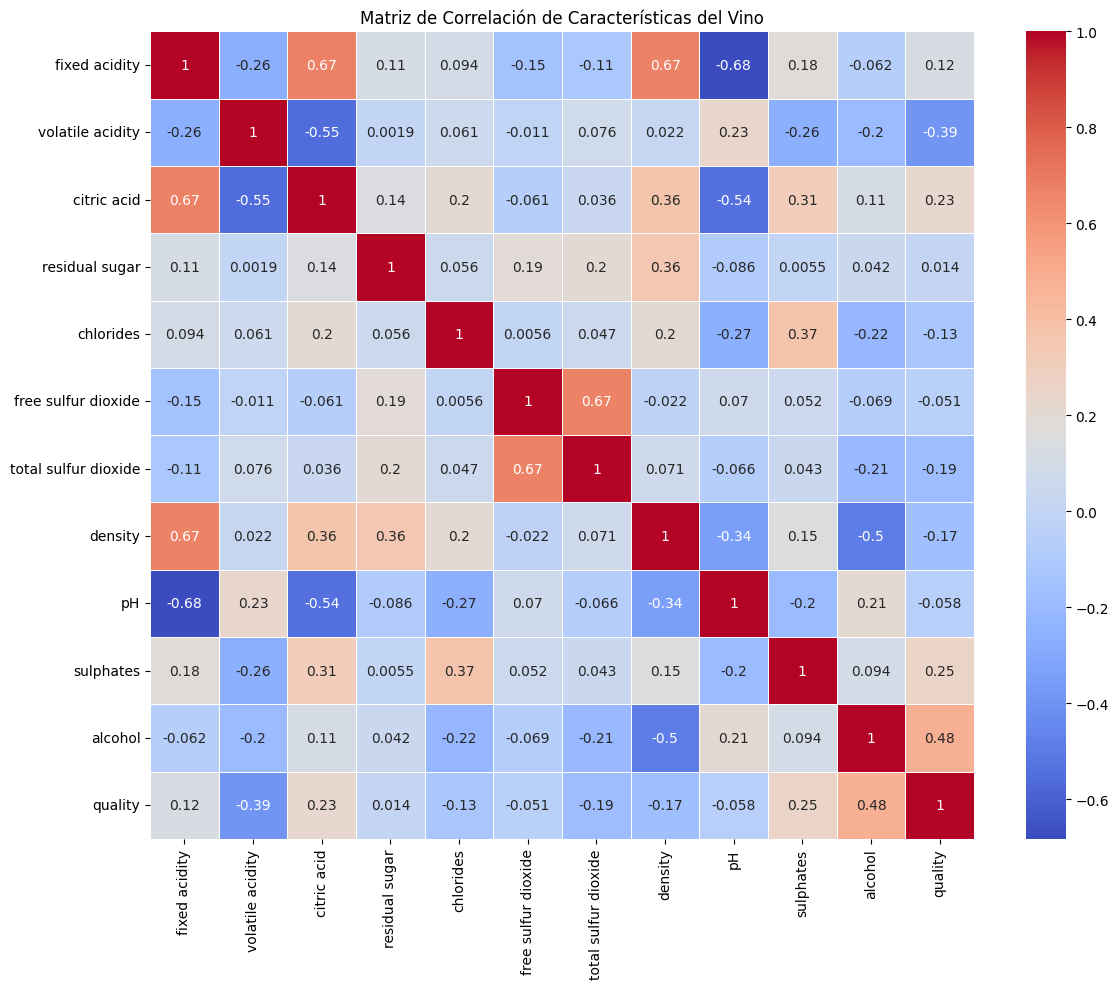

In [7]:
#Antes de proceder con los procesos de reducción una visualización inicial de los datos.

# 1. Histograma de calidades
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='quality', bins=range(3, 10), kde=True)
plt.title('Distribución de Calidades de Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

# 2. Boxplot de características
plt.figure(figsize=(15, 10))
data.boxplot()
plt.title('Distribución de Características del Vino')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 3. Matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de Características del Vino')
plt.tight_layout()
plt.show()

In [3]:
# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame con los resultados de PCA
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['quality'] = y
df_pca['good_wine'] = y_binary

In [11]:
df_pca.head()

,PC1,PC2,quality,good_wine
0,-1.619530,0.450950,5,0
1,-0.799170,1.856553,5,0
2,-0.748479,0.882039,5,0
3,2.357673,-0.269976,6,1
4,-1.619530,0.450950,5,0


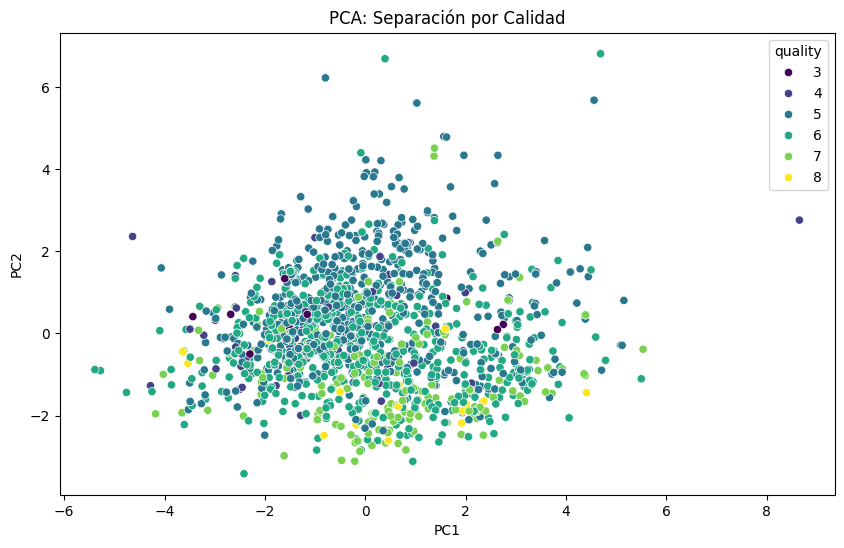

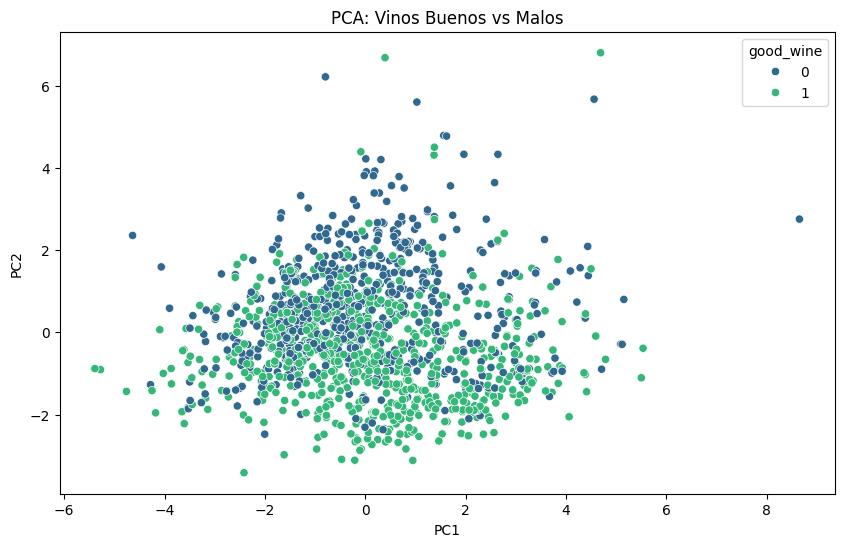

In [4]:
# Función para crear gráficos
def plot_results(df, x, y, hue, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x, y=y, hue=hue, palette='viridis')
    plt.title(title)
    plt.show()

# Visualizar resultados de PCA
plot_results(df_pca, 'PC1', 'PC2', 'quality', 'PCA: Separación por Calidad')
plot_results(df_pca, 'PC1', 'PC2', 'good_wine', 'PCA: Vinos Buenos vs Malos')



In [5]:
# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Crear un DataFrame con los resultados de t-SNE
df_tsne = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['quality'] = y
df_tsne['good_wine'] = y_binary

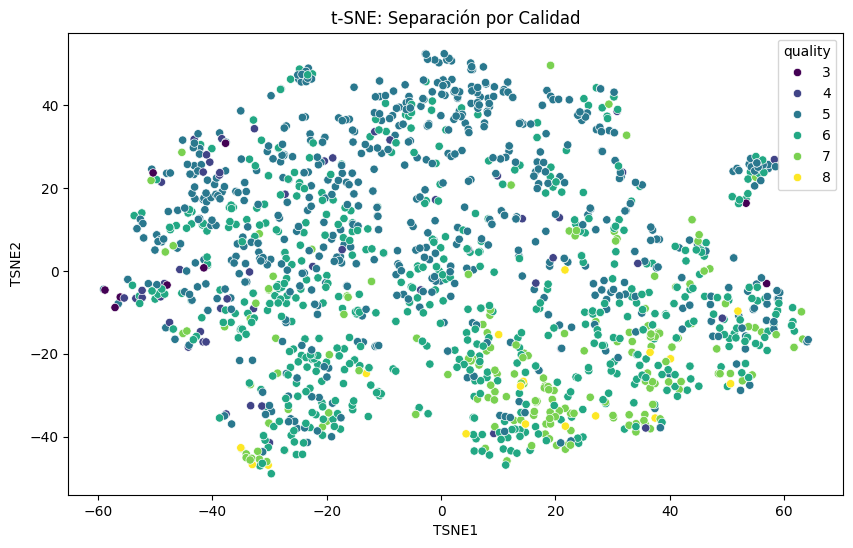

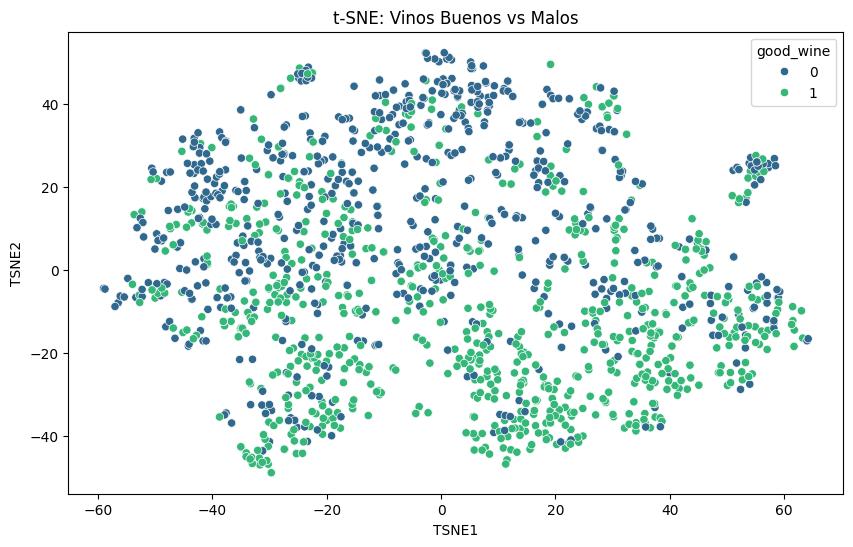

In [6]:
# Visualizar resultados de t-SNE
plot_results(df_tsne, 'TSNE1', 'TSNE2', 'quality', 't-SNE: Separación por Calidad')
plot_results(df_tsne, 'TSNE1', 'TSNE2', 'good_wine', 't-SNE: Vinos Buenos vs Malos')

Análisis de los resultados:

PCA (Análisis de Componentes Principales):

a) Separación por Calidad:

El PCA muestra una superposición considerable entre las diferentes calidades de vino.
No se observa una clara separación entre los grupos de calidad, lo que sugiere que las relaciones lineales capturadas por PCA no son suficientes para distinguir completamente entre las diferentes calidades.

b) Vinos Buenos vs Malos:

Hay una ligera tendencia de los vinos buenos a agruparse más hacia un lado del gráfico, pero aún existe una superposición significativa con los vinos malos.
Esto indica que las características lineales extraídas por PCA tienen cierta capacidad para diferenciar entre vinos buenos y malos, pero no es una separación clara.


t-SNE (t-Distributed Stochastic Neighbor Embedding):

a) Separación por Calidad:

t-SNE muestra una mejor separación entre las diferentes calidades de vino en comparación con PCA.
Se pueden observar algunos clusters más definidos para ciertas calidades, aunque sigue habiendo algunas superposiciones.

b) Vinos Buenos vs Malos:

La separación entre vinos buenos y malos es más evidente en t-SNE que en PCA.
Se pueden observar clusters más definidos para vinos buenos y malos, aunque sigue existiendo cierta superposición.